<a href="https://colab.research.google.com/github/AlexanderVieira/training_datascience/blob/main/DR3_AT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fancyimpute

     |████████████████████████████████| 154 kB 24.9 MB/s 
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=db090c7ba49a6f8e8455c781a19312dec58e1a762f9840cc0e2f00d908a79f0d
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=b55163c08427bdd261707c5d012c6fed3587a34c2d4f312e6b1fb2e6b2276deb
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c0796a99d6b1494760494e0
Successfully built fancyimpute knnimpute


In [2]:
!pip install yellowbrick

In [22]:
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 14.5 MB/s 


In [285]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, learning_curve,  ShuffleSplit, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from fancyimpute import KNN
import sweetviz as sv

In [175]:
dataset = pd.read_csv('/content/wifi_localization.txt', sep='\t', names=['WS1','WS2','WS3','WS4','WS5','WS6','WS7','Class'])
dataset

,WS1,WS2,WS3,WS4,WS5,WS6,WS7,Class
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1
...,...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4


In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   WS1     2000 non-null   int64
 1   WS2     2000 non-null   int64
 2   WS3     2000 non-null   int64
 3   WS4     2000 non-null   int64
 4   WS5     2000 non-null   int64
 5   WS6     2000 non-null   int64
 6   WS7     2000 non-null   int64
 7   Class   2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [58]:
dataset.describe()

,WS1,WS2,WS3,WS4,WS5,WS6,WS7,Class
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-52.330500,-55.623500,-54.964000,-53.566500,-62.640500,-80.985000,-81.726500,2.500000
std,11.321677,3.417688,5.316186,11.471982,9.105093,6.516672,6.519812,1.118314
min,-74.000000,-74.000000,-73.000000,-77.000000,-89.000000,-97.000000,-98.000000,1.000000
25%,-61.000000,-58.000000,-58.000000,-63.000000,-69.000000,-86.000000,-87.000000,1.750000
50%,-55.000000,-56.000000,-55.000000,-56.000000,-64.000000,-82.000000,-83.000000,2.500000
75%,-46.000000,-53.000000,-51.000000,-46.000000,-56.000000,-77.000000,-78.000000,3.250000
max,-10.000000,-45.000000,-40.000000,-11.000000,-36.000000,-61.000000,-63.000000,4.000000


In [59]:
dataset.isnull().sum()

WS1      0
WS2      0
WS3      0
WS4      0
WS5      0
WS6      0
WS7      0
Class    0
dtype: int64

In [60]:
dataset.isna().sum()

WS1      0
WS2      0
WS3      0
WS4      0
WS5      0
WS6      0
WS7      0
Class    0
dtype: int64

In [176]:
dataset.astype('int64')

,WS1,WS2,WS3,WS4,WS5,WS6,WS7,Class
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1
...,...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4


In [72]:
dataset.dtypes

WS1      int64
WS2      int64
WS3      int64
WS4      int64
WS5      int64
WS6      int64
WS7      int64
Class    int64
dtype: object

In [179]:
dataset['Class'] = dataset['Class'].apply(str)
dataset.dtypes 

WS1       int64
WS2       int64
WS3       int64
WS4       int64
WS5       int64
WS6       int64
WS7       int64
Class    object
dtype: object

In [180]:
def rename_field():
  for idx, row in dataset.iterrows():     
    if dataset.Class[idx] == '1':
      dataset.Class[idx] = 'conference_room'
    if dataset.Class[idx] == '2':
      dataset.Class[idx] = 'kitchen'   
    if dataset.Class[idx] == '3':
      dataset.Class[idx] = 'indoor_sport'   
    if dataset.Class[idx] == '4':
      dataset.Class[idx] = 'interview_room'       

In [ ]:
rename_field()

In [182]:
dataset

,WS1,WS2,WS3,WS4,WS5,WS6,WS7,Class
0,-64,-56,-61,-66,-71,-82,-81,conference_room
1,-68,-57,-61,-65,-71,-85,-85,conference_room
2,-63,-60,-60,-67,-76,-85,-84,conference_room
3,-61,-60,-68,-62,-77,-90,-80,conference_room
4,-63,-65,-60,-63,-77,-81,-87,conference_room
...,...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94,interview_room
1996,-59,-56,-50,-62,-47,-87,-90,interview_room
1997,-62,-59,-46,-65,-45,-87,-88,interview_room
1998,-62,-58,-52,-61,-41,-90,-85,interview_room


In [183]:
dataset.Class.nunique()

4

In [184]:
report = sv.analyze(dataset)
report.show_html('eda.html')

                                             |          | [  0%]   00:00 -> (? left)

Report eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [187]:
X = dataset.iloc[:, dataset.columns != 'Class']
y = dataset.iloc[:, 7] 

In [189]:
X

,WS1,WS2,WS3,WS4,WS5,WS6,WS7
0,-64,-56,-61,-66,-71,-82,-81
1,-68,-57,-61,-65,-71,-85,-85
2,-63,-60,-60,-67,-76,-85,-84
3,-61,-60,-68,-62,-77,-90,-80
4,-63,-65,-60,-63,-77,-81,-87
...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94
1996,-59,-56,-50,-62,-47,-87,-90
1997,-62,-59,-46,-65,-45,-87,-88
1998,-62,-58,-52,-61,-41,-90,-85


In [190]:
y

0       conference_room
1       conference_room
2       conference_room
3       conference_room
4       conference_room
             ...       
1995     interview_room
1996     interview_room
1997     interview_room
1998     interview_room
1999     interview_room
Name: Class, Length: 2000, dtype: object

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)

In [203]:
X_train.shape, X_test.shape

((1600, 7), (400, 7))

In [204]:
y_train.shape, y_test.shape

((1600,), (400,))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



[]

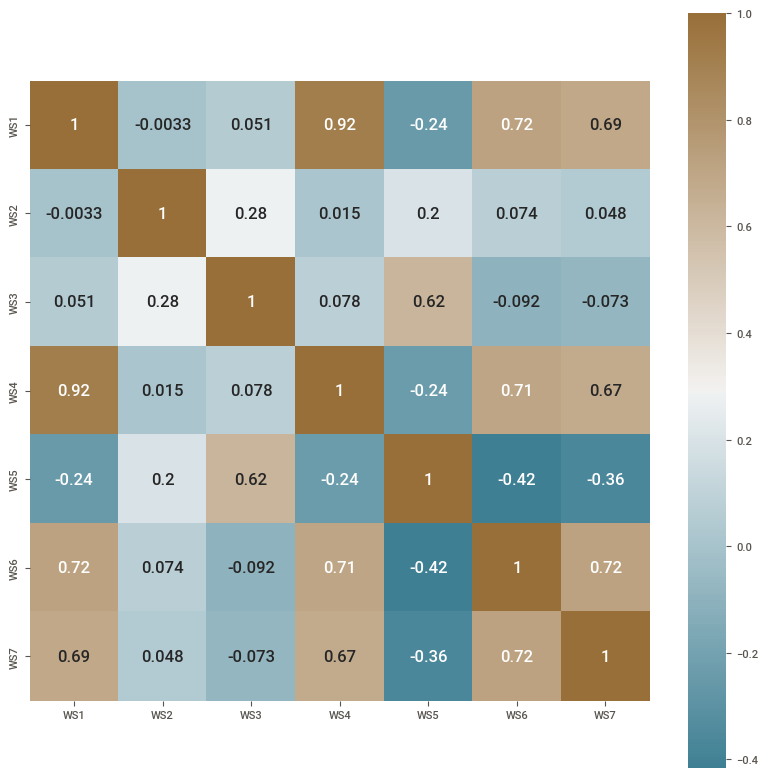

In [205]:
fig1, ax = plt.subplots(figsize=(10, 10))
correlation = X.corr()
sns.heatmap(correlation, mask=np.zeros_like(correlation, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()

In [206]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
          'metric': ['minkowski','euclidean']}
classifier = KNeighborsClassifier()
modelCV = GridSearchCV(classifier, params, cv=5)
modelCV.fit(X_train,y_train)
modelCV.best_params_

# Guardando o melhor modelo encontrado.
best_model = modelCV.best_estimator_
# Inspecionando o melhor modelo encontrado
print(best_model.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


In [207]:
K = best_model.get_params()['n_neighbors']
K

3

In [208]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=K, p=2, weights='uniform')

In [209]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [210]:
prediction = knn.predict(X_test)
prediction

array(['kitchen', 'interview_room', 'indoor_sport', 'indoor_sport',
       'indoor_sport', 'interview_room', 'kitchen', 'conference_room',
       'indoor_sport', 'kitchen', 'indoor_sport', 'indoor_sport',
       'interview_room', 'indoor_sport', 'conference_room',
       'interview_room', 'kitchen', 'indoor_sport', 'kitchen',
       'indoor_sport', 'conference_room', 'interview_room',
       'interview_room', 'kitchen', 'kitchen', 'conference_room',
       'interview_room', 'conference_room', 'kitchen', 'conference_room',
       'interview_room', 'kitchen', 'interview_room', 'kitchen',
       'kitchen', 'kitchen', 'kitchen', 'conference_room', 'kitchen',
       'interview_room', 'conference_room', 'conference_room',
       'indoor_sport', 'indoor_sport', 'indoor_sport', 'interview_room',
       'kitchen', 'interview_room', 'interview_room', 'interview_room',
       'interview_room', 'indoor_sport', 'indoor_sport',
       'conference_room', 'kitchen', 'kitchen', 'kitchen', 'kitchen',
  

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



0.98

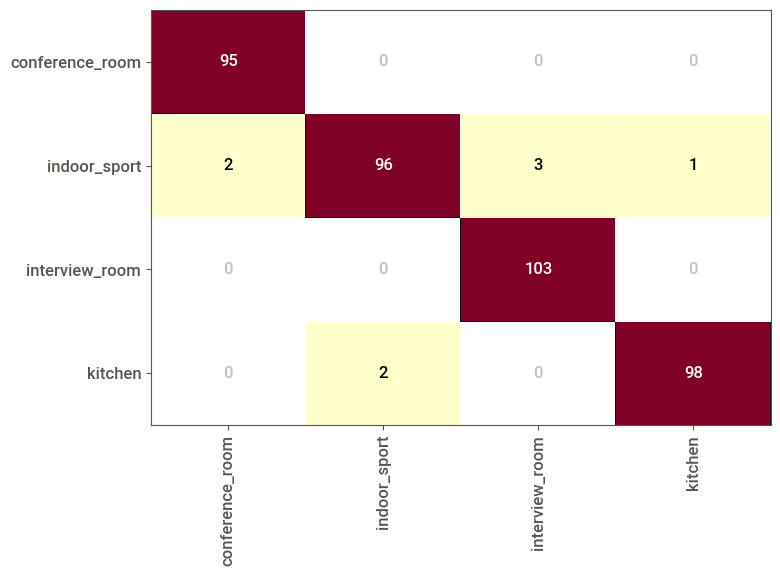

In [211]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [212]:
print(classification_report(y_test, prediction))

                 precision    recall  f1-score   support

conference_room       0.98      1.00      0.99        95
   indoor_sport       0.98      0.94      0.96       102
 interview_room       0.97      1.00      0.99       103
        kitchen       0.99      0.98      0.98       100

       accuracy                           0.98       400
      macro avg       0.98      0.98      0.98       400
   weighted avg       0.98      0.98      0.98       400



In [213]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
  
  if axes is None:
    _, axes = plt.subplots(1, 3, figsize=(20, 5))  

  axes[0].set_title(title)
  if ylim is not None:
    axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")
    
    return plt

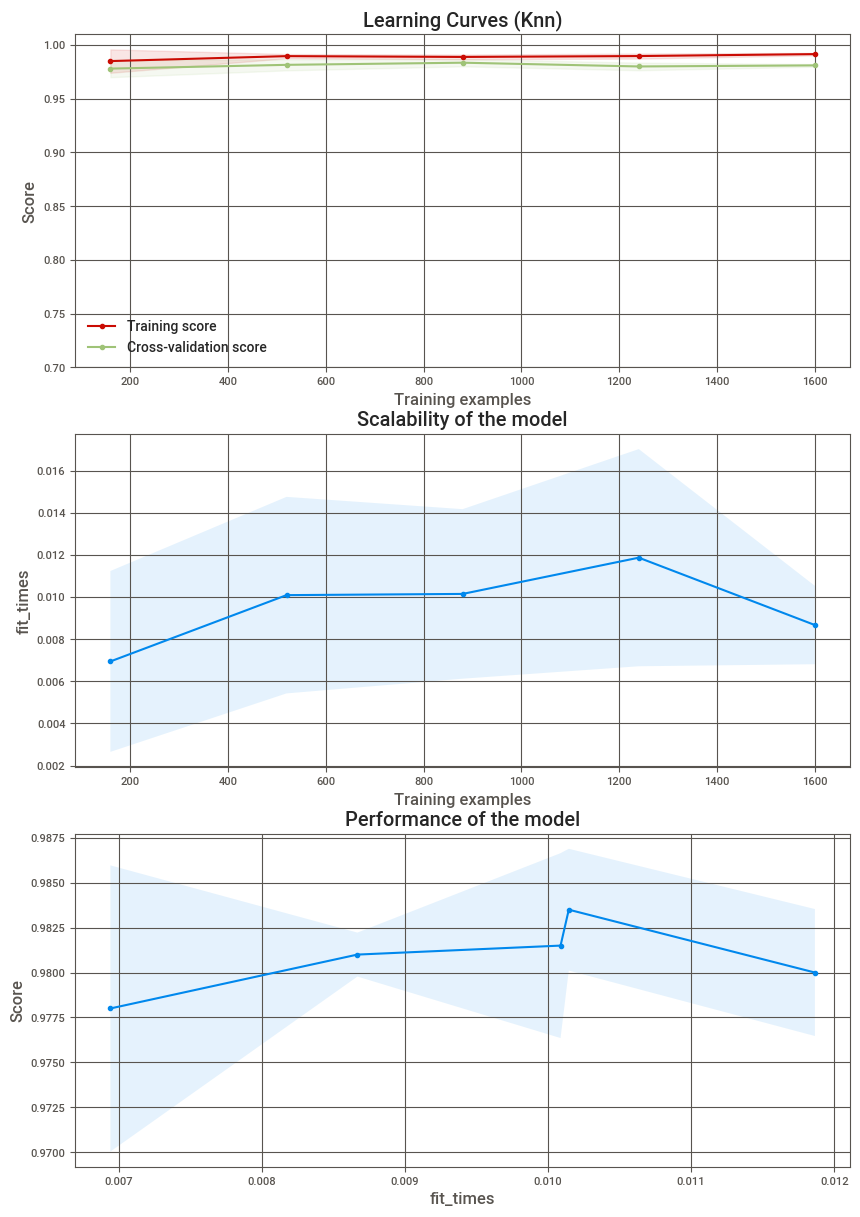

In [214]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Knn is more expensive so we do a lower number of Knn iterations:
title = "Learning Curves (Knn)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#knn_smarket = KNeighborsClassifier(n_neighbors=K)
plot_learning_curve(
    knn, title, X, y, axes=axes, ylim=(0.7, 1.01), cv=cv, n_jobs=4
)
plt.show()

In [216]:
df = pd.read_csv('/content/machine.data', names=['vendor','Model','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP'])
df

,vendor,Model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vendor  209 non-null    object
 1   Model   209 non-null    object
 2   MYCT    209 non-null    int64 
 3   MMIN    209 non-null    int64 
 4   MMAX    209 non-null    int64 
 5   CACH    209 non-null    int64 
 6   CHMIN   209 non-null    int64 
 7   CHMAX   209 non-null    int64 
 8   PRP     209 non-null    int64 
 9   ERP     209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [221]:
df.describe().astype('int64')

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209,209,209,209,209,209,209,209
mean,203,2867,11796,25,4,18,105,99
std,260,3878,11726,40,6,25,160,154
min,17,64,64,0,0,0,6,15
25%,50,768,4000,0,1,5,27,28
50%,110,2000,8000,8,2,8,50,45
75%,225,4000,16000,32,6,24,113,101
max,1500,32000,64000,256,52,176,1150,1238


In [222]:
df.isnull().sum()

vendor    0
Model     0
MYCT      0
MMIN      0
MMAX      0
CACH      0
CHMIN     0
CHMAX     0
PRP       0
ERP       0
dtype: int64

In [223]:
df.isna().sum()

vendor    0
Model     0
MYCT      0
MMIN      0
MMAX      0
CACH      0
CHMIN     0
CHMAX     0
PRP       0
ERP       0
dtype: int64

In [226]:
df.nunique()

vendor     30
Model     209
MYCT       60
MMIN       25
MMAX       23
CACH       22
CHMIN      15
CHMAX      31
PRP       116
ERP       104
dtype: int64

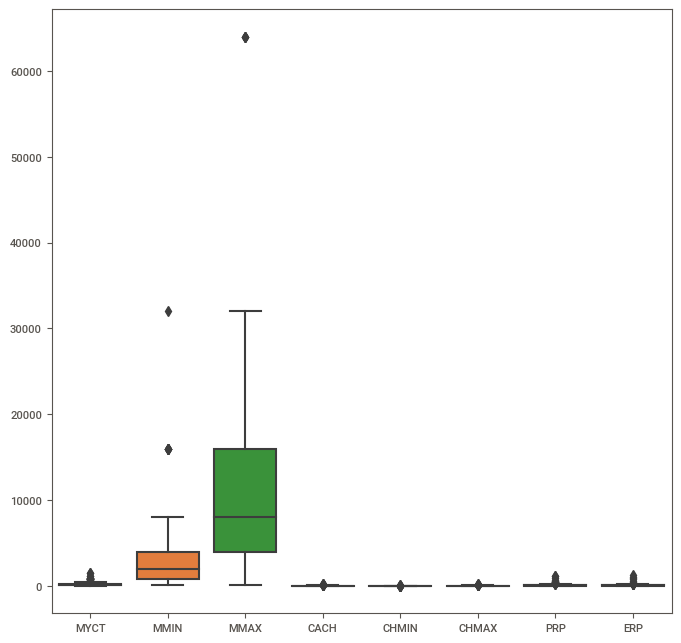

In [224]:
sns.boxplot(data=df[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP']])
fig=plt.gcf()
fig.set_size_inches(8,8)

In [225]:
report = sv.analyze(df)
report.show_html('eda_cpu.html')

                                             |          | [  0%]   00:00 -> (? left)

Report eda_cpu.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [251]:
#X = df.iloc[:, 2:8].values
#y = df.iloc[:, 9].values

In [256]:
X = df[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP']].values
y = df.iloc[:, 9].values 

In [257]:
X

array([[  125,   256,  6000, ...,    16,   128,   198],
       [   29,  8000, 32000, ...,     8,    32,   269],
       [   29,  8000, 32000, ...,     8,    32,   220],
       ...,
       [  125,  2000,  8000, ...,     2,    14,    52],
       [  480,   512,  8000, ...,     0,     0,    67],
       [  480,  1000,  4000, ...,     0,     0,    45]])

In [258]:
y

array([ 199,  253,  253,  253,  132,  290,  381,  381,  749, 1238,   23,
         24,   70,  117,   15,   64,   23,   29,   22,  124,   35,   39,
         40,   45,   28,   21,   28,   22,   28,   27,  102,  102,   74,
         74,  138,  136,   23,   29,   44,   30,   41,   74,   74,   74,
         54,   41,   18,   28,   36,   38,   34,   19,   72,   36,   30,
         56,   42,   34,   34,   34,   34,   34,   19,   75,  113,  157,
         18,   20,   28,   33,   47,   54,   20,   23,   25,   52,   27,
         50,   18,   53,   23,   30,   73,   20,   25,   28,   29,   32,
        175,   57,  181,  181,   32,   82,  171,  361,  350,  220,  113,
         15,   21,   35,   18,   20,   20,   28,   45,   18,   17,   26,
         28,   28,   31,   31,   42,   76,   76,   26,   59,   65,  101,
        116,   18,   20,   20,   30,   44,   44,   82,   82,  128,   37,
         46,   46,   80,   88,   88,   33,   46,   29,   53,   53,   41,
         86,   95,  107,  117,  119,  120,   48,  1

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)

In [260]:
X_train.shape, X_test.shape

((167, 7), (42, 7))

In [261]:
y_train.shape, y_test.shape

((167,), (42,))

In [266]:
model = DecisionTreeRegressor(max_depth=5, random_state=10).fit(X_train,y_train)

In [267]:
predictions = model.predict(X_test)

In [269]:
df2 = pd.DataFrame({'actual': y_test, 'pred': predictions.astype('int64')})
print(df2.head(10))

   actual  pred
0      54    58
1      67    58
2      19    24
3      23    24
4     136   178
5     175   178
6      74    58
7     120   108
8     149   108
9     128   108


In [290]:
def RMSE(y_actual,y_predicted):
    rmse = np.sqrt(mean_squared_error(y_actual,y_predicted))
    return rmse.round(2)

In [294]:
print("Root Mean Squared Error: " + str(RMSE(df2.actual, df2.pred)))
print("Mean Squared Error: " + str(mean_squared_error(df2.actual, df2.pred).round(2)))
print("Mean Absolute Error: " + str(mean_absolute_error(df2.actual, df2.pred).round(2)))
print("Mean Absolute Percentage Error: " + str(mean_absolute_percentage_error(df2.actual, df2.pred).round(2)*100)+'%')
print("R^2 Score(coefficient of determination) = "+str(r2_score(df2.actual, df2.pred).round(2)))
print("Accuracy Train: " + str(model.score(X_train, y_train)))
print("Accuracy Test: " + str(model.score(X_test, y_test).round(2)))

Root Mean Squared Error: 24.72
Mean Squared Error: 611.19
Mean Absolute Error: 14.71
Mean Absolute Percentage Error: 16.0%
R^2 Score(coefficient of determination) = 0.92
Accuracy Train: 0.9968325742158444
Accuracy Test: 0.91


In [282]:
predictor_attributes = []
for column in df.columns[2:9]:
    predictor_attributes.append(column)

In [283]:
predictor_attributes

['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP']

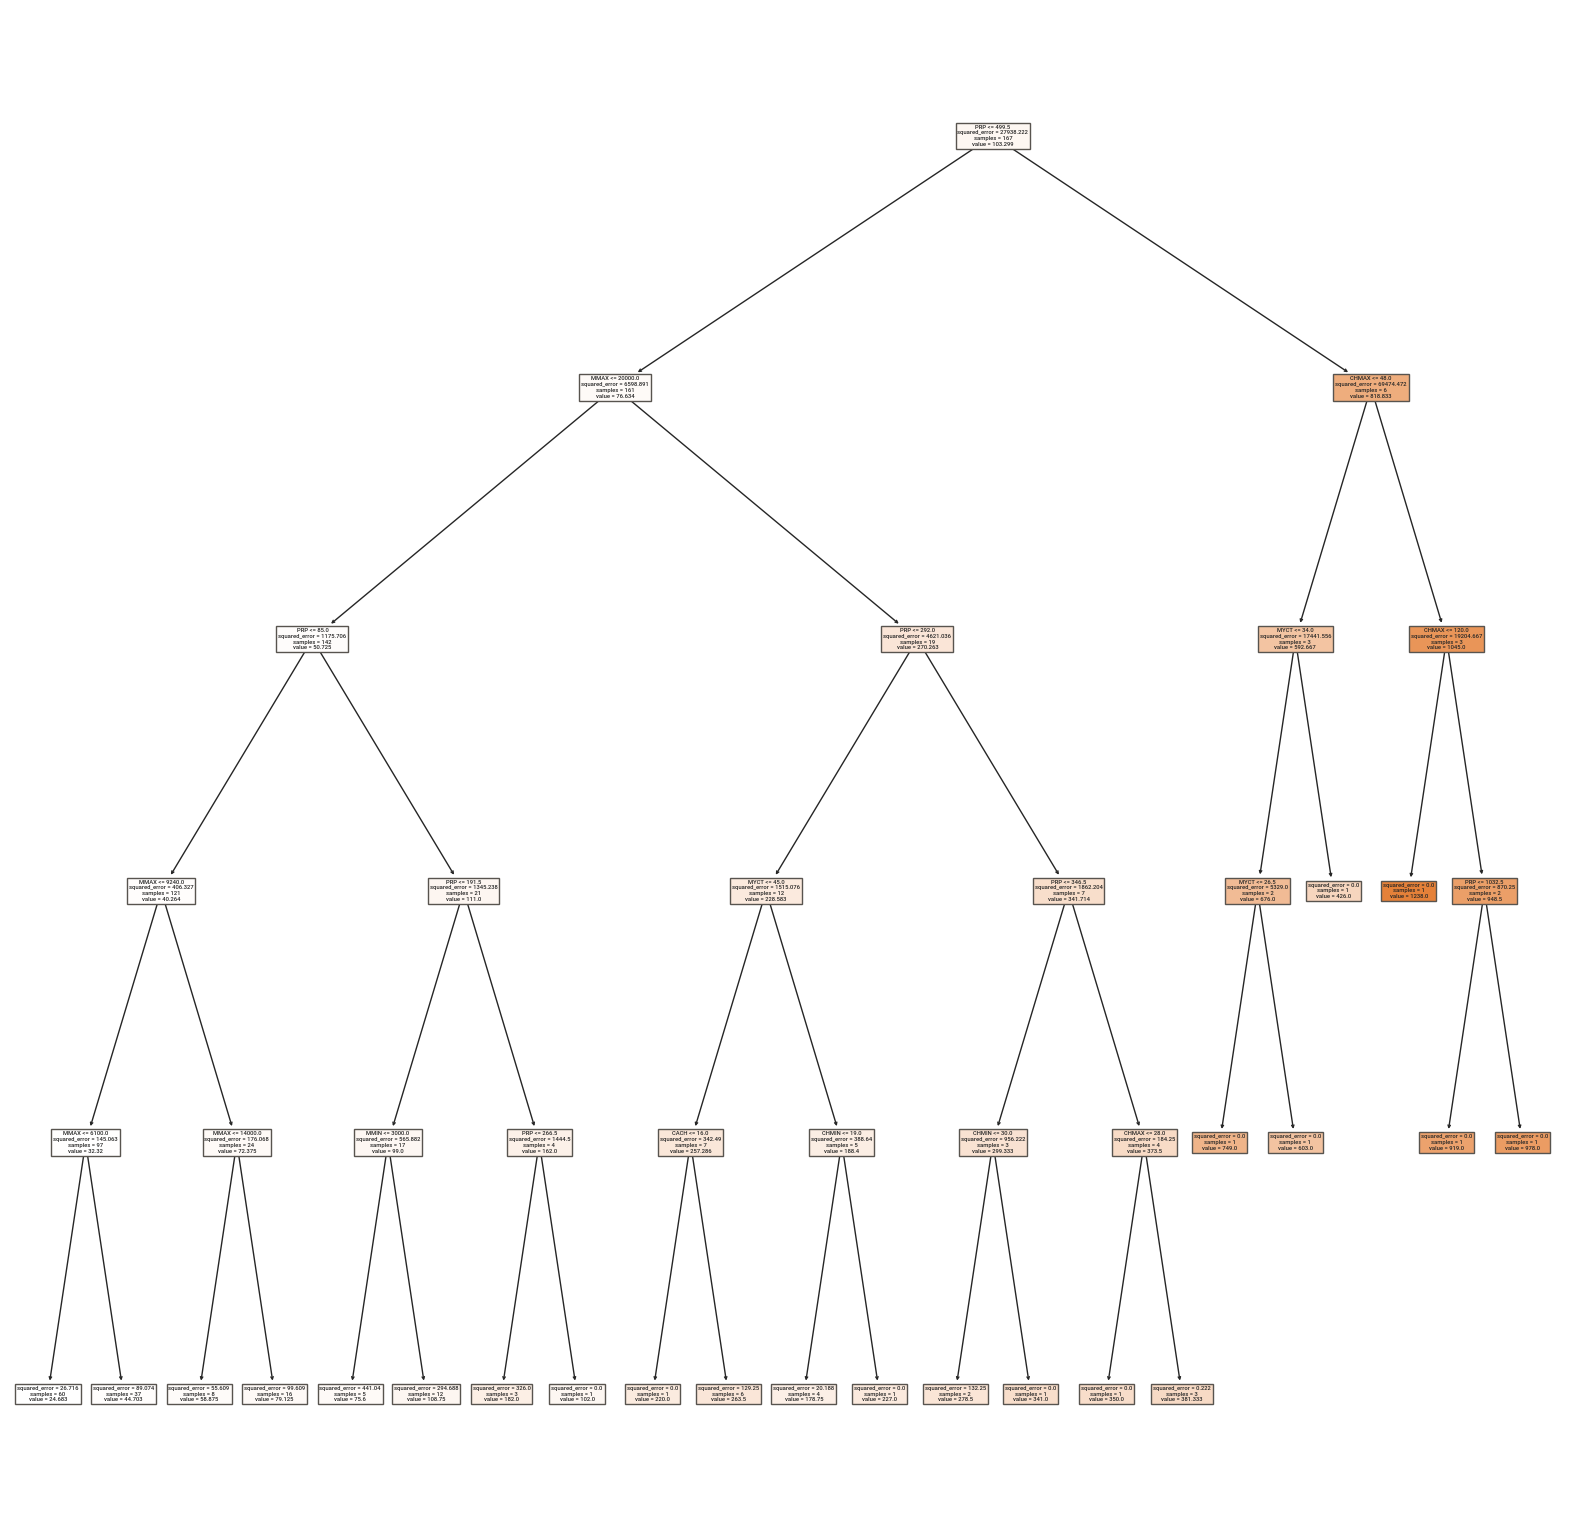

In [284]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
tree.plot_tree(model, feature_names=predictor_attributes, filled=True);
fig.savefig('peformance.png')